In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb

from cinnamon.drift import OutputDriftDetector

# Breast Cancer Data

In [2]:
dataset = datasets.load_breast_cancer()

In [3]:
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y = dataset.target

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Build XGBoost model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [6]:
clf = XGBClassifier(n_estimators=1000,
                    booster="gbtree",
                    objective="binary:logistic",
                    learning_rate=0.05,
                    max_depth=6,
                    use_label_encoder=False,
                    seed=2021)

In [7]:
clf.fit(X=X_train, y=y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=10)

[21:25:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.65349
[10]	validation_0-logloss:0.39963
[20]	validation_0-logloss:0.28059
[30]	validation_0-logloss:0.21149
[40]	validation_0-logloss:0.16765
[50]	validation_0-logloss:0.14519
[60]	validation_0-logloss:0.13101
[70]	validation_0-logloss:0.12157
[80]	validation_0-logloss:0.11758
[90]	validation_0-logloss:0.11513
[100]	validation_0-logloss:0.11288
[110]	validation_0-logloss:0.11233
[120]	validation_0-logloss:0.11187
[130]	validation_0-logloss:0.11200
[140]	validation_0-logloss:0.11186
[145]	validation_0-logloss:0.11185


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=2021, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

# Analyze data drift with OutputDriftDetector

The experiment is done with a random split so we should not detect a data drift

### prediction_type='proba'

In [8]:
output_drift_detector = OutputDriftDetector(task='classification', prediction_type='proba')

In [9]:
clf.predict_proba(X_train)

array([[0.01756603, 0.982434  ],
       [0.9958608 , 0.00413918],
       [0.00973105, 0.99026895],
       [0.00408947, 0.9959105 ],
       [0.01956689, 0.9804331 ],
       [0.996238  , 0.00376199],
       [0.00461417, 0.9953858 ],
       [0.86516625, 0.13483377],
       [0.00591052, 0.9940895 ],
       [0.003757  , 0.996243  ],
       [0.91995704, 0.08004293],
       [0.00394022, 0.9960598 ],
       [0.9964226 , 0.00357739],
       [0.00949997, 0.99050003],
       [0.9958443 , 0.0041557 ],
       [0.9952596 , 0.00474041],
       [0.0031575 , 0.9968425 ],
       [0.00973219, 0.9902678 ],
       [0.1573245 , 0.8426755 ],
       [0.9959885 , 0.00401152],
       [0.01018208, 0.9898179 ],
       [0.00387615, 0.99612385],
       [0.9961831 , 0.00381688],
       [0.00337458, 0.9966254 ],
       [0.02513015, 0.97486985],
       [0.00559616, 0.99440384],
       [0.9959242 , 0.00407584],
       [0.99611   , 0.00388997],
       [0.00301129, 0.9969887 ],
       [0.00413078, 0.9958692 ],
       [0.

In [10]:
output_drift_detector.fit(clf.predict_proba(X_train), clf.predict_proba(X_test),
                           y_train, y_test)

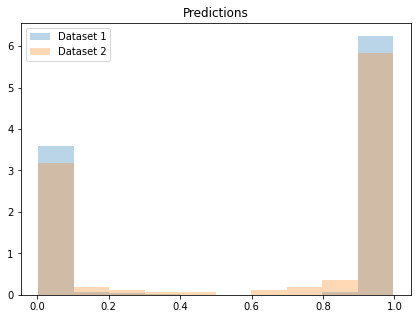

[DriftMetricsNum(mean_difference=0.00798452225707491, wasserstein=0.024082025832758043, ks_test=BaseStatisticalTestResult(statistic=0.08323782655969908, pvalue=0.35428891768775117))]

In [11]:
output_drift_detector.plot_prediction_drift()
output_drift_detector.get_prediction_drift()

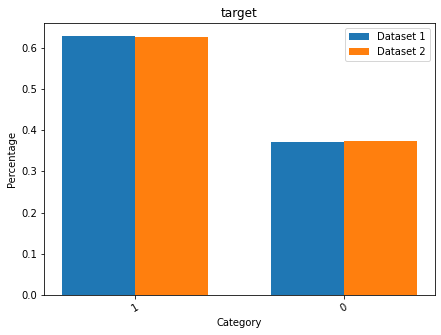

DriftMetricsCat(wasserstein=0.0024097093655411628, jensen_shannon=0.0017616379091961293, chi2_test=Chi2TestResult(statistic=0.0, pvalue=1.0, dof=1, contingency_table=        0      1
X1  148.0  250.0
X2   64.0  107.0))

In [12]:
output_drift_detector.plot_target_drift()
output_drift_detector.get_target_drift()

In [13]:
output_drift_detector.get_performance_metrics_drift()

PerformanceMetricsDrift(dataset1=ClassificationMetrics(accuracy=1.0, log_loss=0.016039305599991362), dataset2=ClassificationMetrics(accuracy=0.9473684210526315, log_loss=0.11116574995208815))

### prediction_type='label'

In [14]:
output_drift_detector2 = OutputDriftDetector(task='classification', prediction_type='label')

In [15]:
output_drift_detector2.fit(clf.predict(X_train), clf.predict(X_test),
                            y_train, y_test)

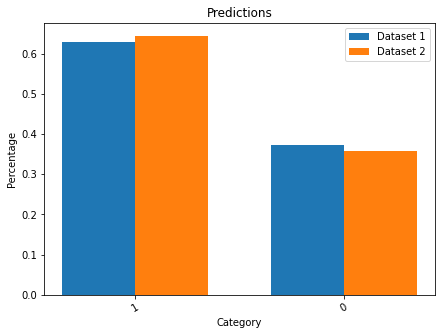

[DriftMetricsCat(wasserstein=0.015134150283581616, jensen_shannon=0.011119138338504947, chi2_test=Chi2TestResult(statistic=0.06175606172739494, pvalue=0.8037416368764607, dof=1, contingency_table=        0      1
 X1  148.0  250.0
 X2   61.0  110.0))]

In [16]:
output_drift_detector2.plot_prediction_drift()
output_drift_detector2.get_prediction_drift()

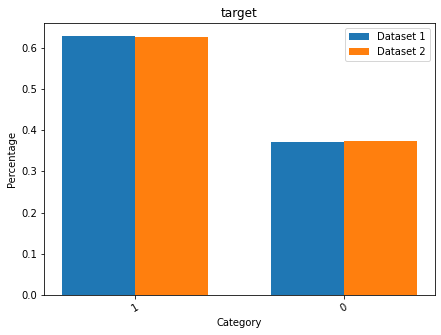

DriftMetricsCat(wasserstein=0.0024097093655411628, jensen_shannon=0.0017616379091961293, chi2_test=Chi2TestResult(statistic=0.0, pvalue=1.0, dof=1, contingency_table=        0      1
X1  148.0  250.0
X2   64.0  107.0))

In [17]:
output_drift_detector2.plot_target_drift()
output_drift_detector2.get_target_drift()

In [18]:
output_drift_detector2.get_performance_metrics_drift()

PerformanceMetricsDrift(dataset1=ClassificationMetrics(accuracy=1.0, log_loss=None), dataset2=ClassificationMetrics(accuracy=0.9473684210526315, log_loss=None))

### prediction_type='raw'

In [19]:
output_drift_detector3 = OutputDriftDetector(task='classification', prediction_type='raw')

In [20]:
output_drift_detector3.fit(clf.predict(X_train, output_margin=True), clf.predict(X_test, output_margin=True),
                            y_train, y_test)

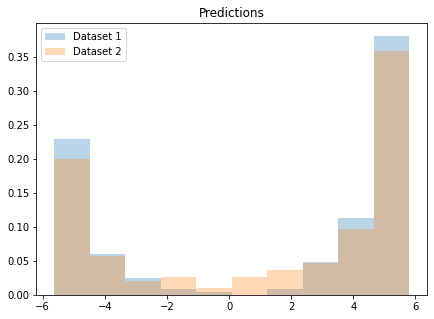

[DriftMetricsNum(mean_difference=0.005498574879272855, wasserstein=0.3764544601013494, ks_test=BaseStatisticalTestResult(statistic=0.08323782655969908, pvalue=0.35428891768775117))]

In [21]:
output_drift_detector3.plot_prediction_drift()
output_drift_detector3.get_prediction_drift()

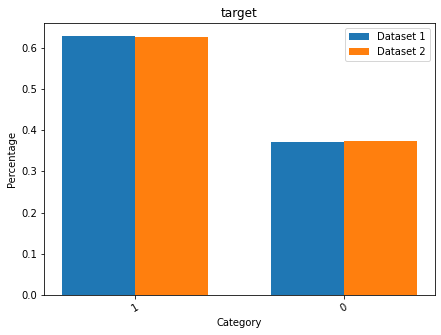

DriftMetricsCat(wasserstein=0.0024097093655411628, jensen_shannon=0.0017616379091961293, chi2_test=Chi2TestResult(statistic=0.0, pvalue=1.0, dof=1, contingency_table=        0      1
X1  148.0  250.0
X2   64.0  107.0))

In [22]:
output_drift_detector3.plot_target_drift()
output_drift_detector3.get_target_drift()

In [23]:
output_drift_detector3.get_performance_metrics_drift()

PerformanceMetricsDrift(dataset1=ClassificationMetrics(accuracy=1.0, log_loss=0.016039305803571925), dataset2=ClassificationMetrics(accuracy=0.9473684210526315, log_loss=0.11116572790125613))